# Prison Break

## Libraries imported and functions created

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

def data_from_url(url):
    df = pd.read_html(url)[1]
    lol = df.to_numpy().tolist()
    return lol


def fetch_year(date_string):
    return int(re.findall("\d{4}", date_string)[0])


def barplot(list_of_2_element_list):
    d = {ya[0]:ya[1] for ya in list_of_2_element_list}
    plt.figure(figsize=(9,15))
    axes = plt.axes()
    axes.get_xaxis().set_visible(False)

    spines = axes.spines
    spines['top'].set_visible(False)
    spines['right'].set_visible(False)
    spines['bottom'].set_visible(False)
    spines['left'].set_visible(False)
    ax = plt.barh(*zip(*d.items()), height=.5)
    plt.yticks(list(d.keys()), list(d.keys()))
    plt.xticks(range(4), range(4))
    rectangles = ax.patches
    for rectangle in rectangles:
        x_value = rectangle.get_width()
        y_value = rectangle.get_y() + rectangle.get_height() / 2
        space = 5
        ha = 'left'
        label = "{}".format(x_value)
        if x_value > 0:
            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha)

    axes.tick_params(tick1On=False)
    plt.show()

def unique_countries(countries):
    s = pd.Series(countries)
    return list(s.unique())

def display_no_index(df):
    display(HTML(df.to_html(index=False)))
    
def print_pretty_table(countries_frequency):
    countries = df.Country.value_counts().index
    occurrences = df.Country.value_counts().values
    d = {"Country": countries, "Number of Occurrences": occurrences}
    display_no_index(pd.DataFrame(d))

df = pd.read_html("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes")[1]
df = df[["Date", "Prison name", "Country", "Succeeded", "Escapee(s)"]]

***

## Get the Data and Inspect

Data scraped from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

In [3]:
data = data_from_url(url)

Inspect the data, printed the first three rows

In [4]:
for row in data[0:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

In [5]:
index = 0

In [6]:
for row in data[0:3]:
    print(row[0:5])
    index+= 1

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


***

## Figure out attempts per year

In [7]:
for row in data[0:3]:
    print(fetch_year(row[0]))

1971
1973
1978


In [8]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
print(fetch_year(max_year))

2020


In [9]:
years = []
for y in range(fetch_year(min_year), fetch_year(max_year) + 1):
    years.append(y)
   

In [10]:
attempts_per_year = [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]

In [11]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if fetch_year(row[0]) == y:
            ya[1] += 1
print(attempts_per_year)

([1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1])


***

## In which year did the most attempts at breaking out of prison with a helicopter occur?

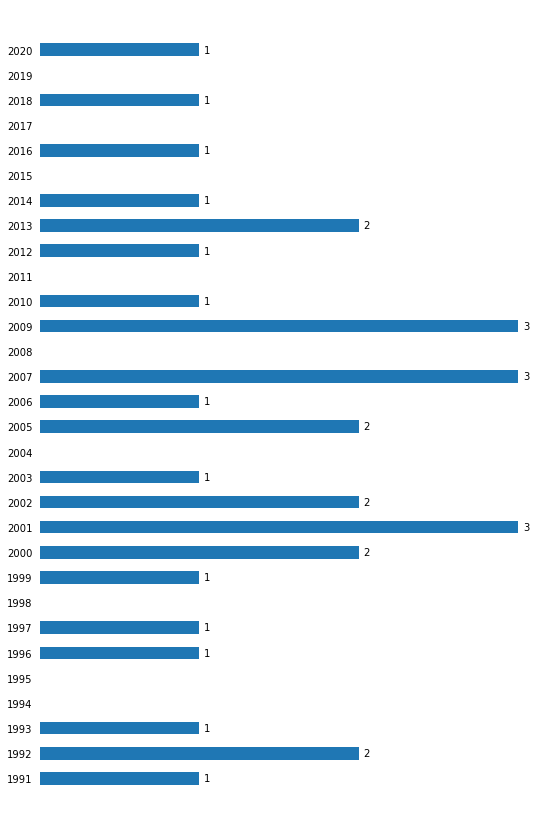

In [12]:
%matplotlib inline
barplot(attempts_per_year)

The highest number of attempted escapes is 3. It appears that multiple years shared this number: 2001, 2007, and 2009.

***

## In which countries do the most attempted helicopter prison escapes occur?

In [13]:
countries_frequency = df["Country"].value_counts()

In [14]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


France has the highest number of attempted helicopter prison escapes.

***

# Conclusion

* The years with the highest number of attempted helicopte prison escapes are 2001, 2007, and 2009.

* France has the highest number of attempted helicopter prison escapes.